In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', facecolor='white', dpi=100, frameon=False)
cr.settings.verbosity = 2

In [3]:
print(scv.__version__)

0.3.3


In [2]:
adata = sc.read_h5ad('/Users/chupan/Documents/gscProj/seurat/stemdata/GSC.h5ad')
adata

AnnData object with n_obs × n_vars = 35999 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'percent.mt', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'id', 'barcode', 'pc_1', 'pc_2'
    uns: 'id_colors'
    obsm: 'X_pca'

In [3]:
# load loom files for spliced/unspliced matrices for each sample:

ldata1 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G523_L/G523_L.loom')
ldata2 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G583_L/G583_L.loom')
ldata3 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G620_L/G620_L.loom')
ldata4 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G797_L/G797_L.loom')
ldata5 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G828_L/G828_L.loom')
ldata6 = sc.read_loom('/Users/chupan/Documents/gscProj/velocity/velocyto/G837_L/G837_L.loom')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicate

In [4]:
barcodes = ['G523|' + bc[0:len(bc)-1] for bc in ldata1.obs.index.tolist()]
ldata1.obs.index = barcodes
barcodes = ['G583|' + bc[0:len(bc)-1] for bc in ldata2.obs.index.tolist()]
ldata2.obs.index = barcodes
barcodes = ['G620|' + bc[0:len(bc)-1] for bc in ldata3.obs.index.tolist()]
ldata3.obs.index = barcodes
barcodes = ['G797|' + bc[0:len(bc)-1] for bc in ldata4.obs.index.tolist()]
ldata4.obs.index = barcodes
barcodes = ['G828|' + bc[0:len(bc)-1] for bc in ldata5.obs.index.tolist()]
ldata5.obs.index = barcodes
barcodes = ['G837|' + bc[0:len(bc)-1] for bc in ldata6.obs.index.tolist()]
ldata6.obs.index = barcodes


In [5]:
# make variable names unique
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()
ldata3.var_names_make_unique()
ldata4.var_names_make_unique()
ldata5.var_names_make_unique()
ldata6.var_names_make_unique()

/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/utils.py:268: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/anndata/utils.py:268: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-package

In [6]:
# concatenate the three loom
ldata = ldata1.concatenate([ldata2, ldata3, ldata4, ldata5, ldata6])

In [7]:
adata = scv.utils.merge(adata, ldata)

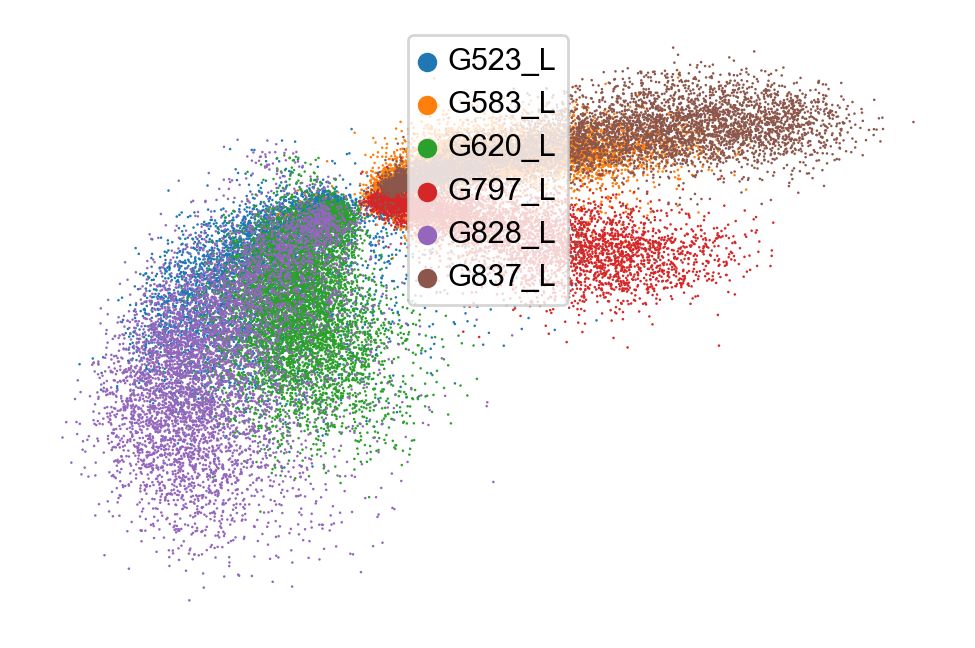

In [8]:
# plot umap to check
sc.pl.pca(adata, color='id', frameon=False, legend_loc='upper center', title='', save='_celltypes.pdf')

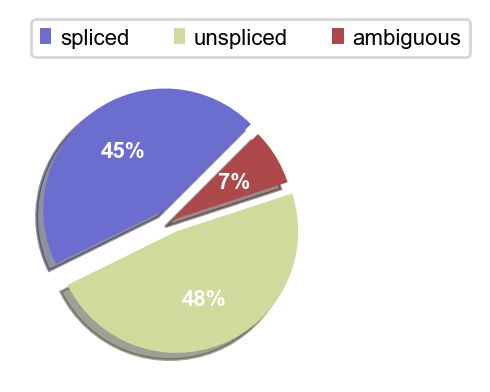

In [9]:
scv.pl.proportions(adata, groupby='celltype_full')

In [10]:
# pre-process
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.


/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.
computing neighbors


/var/folders/m8/rxbn_j0j7fdg3v9js_sb_c940000gn/T/ipykernel_37914/56282837.py:3: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:40) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
# compute velocity
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing velocities


/Users/chupan/miniconda3/envs/cpan/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:42) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/28 cores)
    finished (0:01:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [18]:
adata

AnnData object with n_obs × n_vars = 35994 × 23231
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'percent.mt', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'id', 'barcode', 'pc_1', 'pc_2', 'sample_batch', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'id_colors', 'log1p', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_embedding.pdf


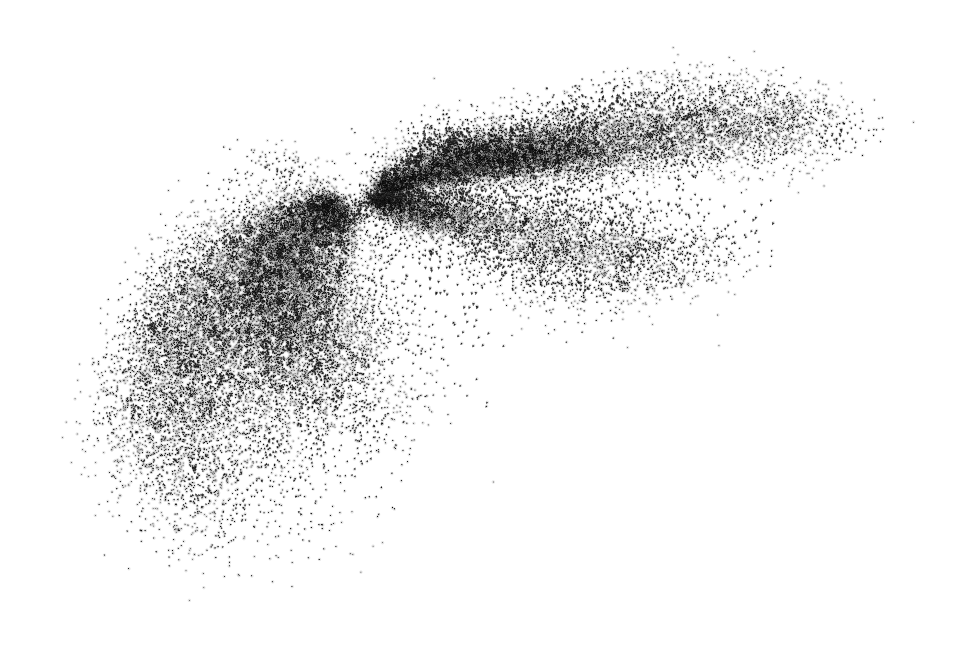

In [19]:
scv.pl.velocity_embedding(adata, basis='X_pca', frameon=False, save='embedding.pdf')

saving figure to file ./figures/scvelo_embedding_grid.pdf


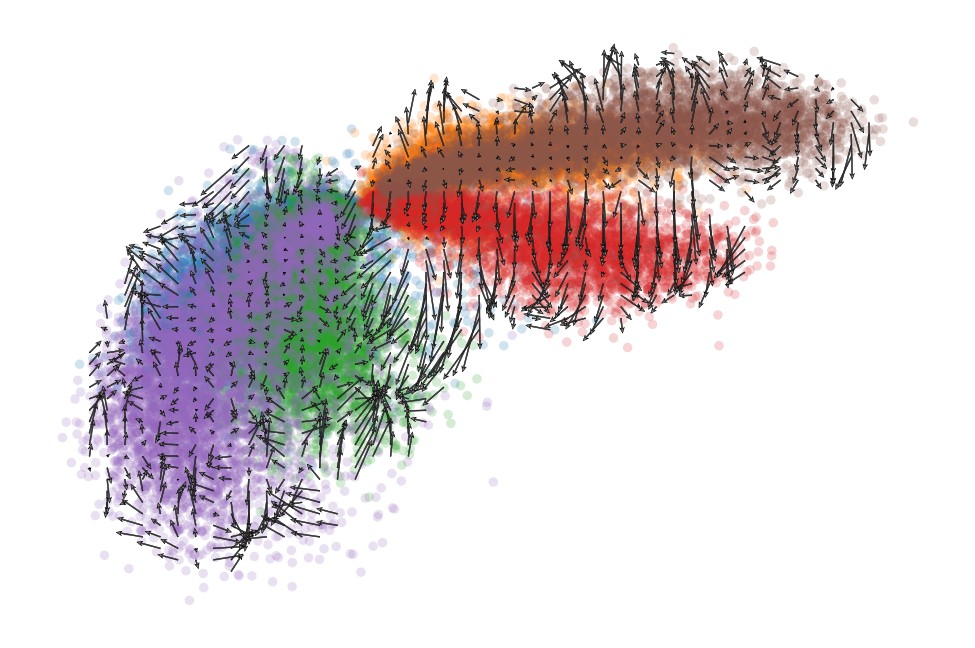

In [21]:
scv.pl.velocity_embedding_grid(adata, basis='X_pca', color='id', save='embedding_grid.pdf', title='', scale=0.25)

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file ./figures/scvelo_embedding_stream.png


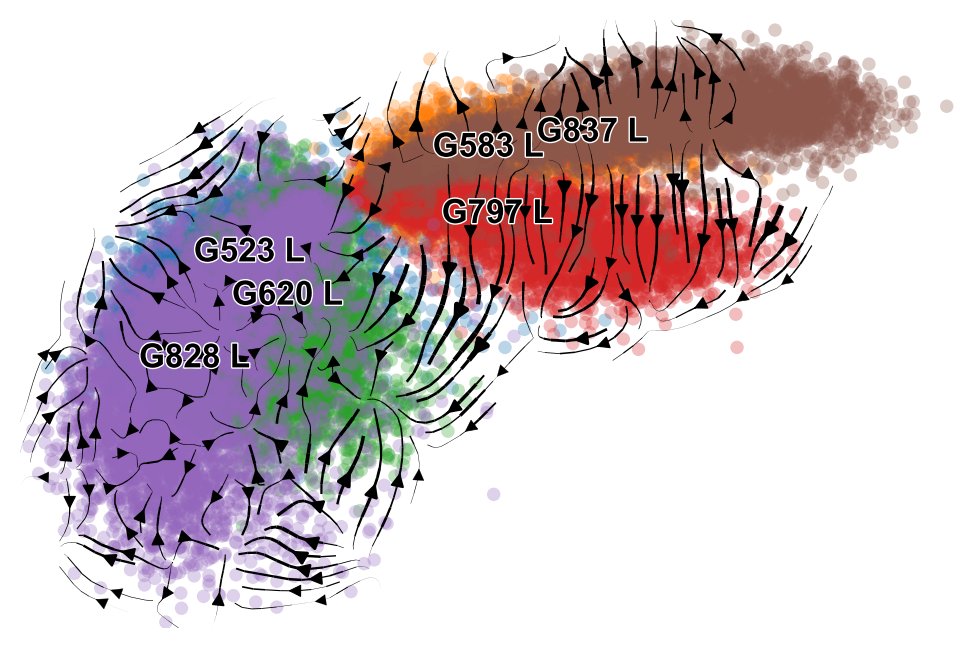

In [23]:
scv.pl.velocity_embedding_stream(adata, basis='X_pca', color=['id'], save='embedding_stream.pdf', title='')